Домашнее задание «Модели ARMA»

1.  Выберите ряд из первого задания.
2.  Постройте его модель ARIMA.
3.  Оформите отчёт в Jupyter-ноутбук.

Дополнительное задание
Попробуйте спрогнозировать график классическим ML.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

## Warning ingrone

In [2]:
import warnings
warnings.filterwarnings("ignore")


## Functions

In [3]:
def tsplot(y, lags=None, figsize=(10, 6), style='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y,
                               lags=lags,
                               ax=pacf_ax,
                               alpha=0.05,
                               method='ywm')

        plt.tight_layout()
    return

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

## Load data

In [28]:
# Загрузим данные
df = pd.read_csv('Series\weekly-closings-of-the-dowjones-.csv',
                 parse_dates=[0],
                 index_col=0)

series = df.reset_index().iloc[:, -1]


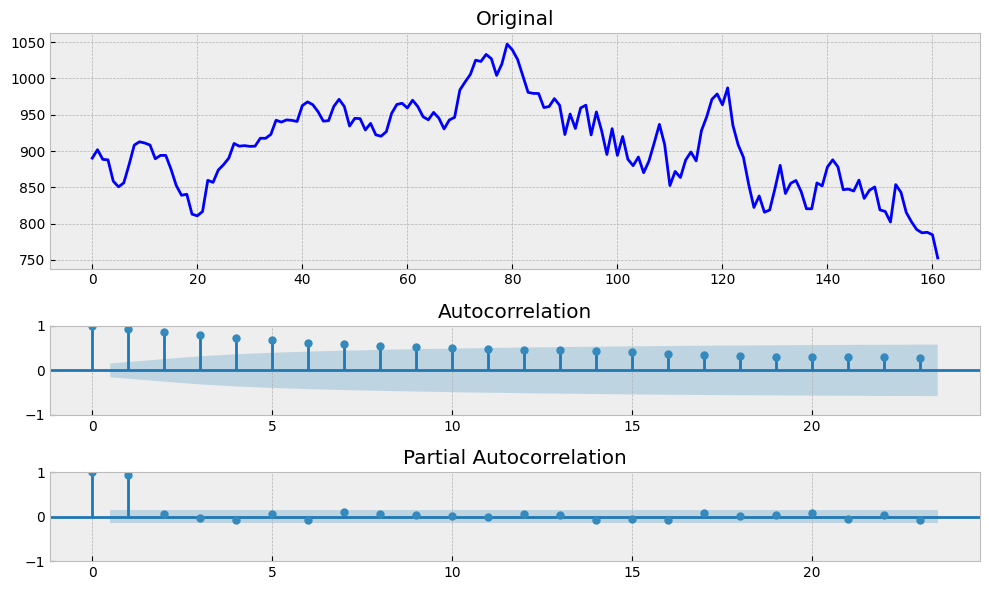

In [6]:
tsplot(series)

## ARIMA

ARIMA - естественное расширение модели ARMA. Vногие временные ряды не стационарны, но они могут такими стать в результате операции дифференцирования. В модели ARIMA "дифференцирование" (в количестве d-раз) вносится в саму модель

$\delta^p y_t = c + \sum_{i=1}^p a_i \delta^d y_{t-i} + \sum_{j=1}^q b_j \epsilon_{t-j} + \epsilon_t$

In [7]:
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                # tmp_mdl = sm.tsa.arima.ARIMA(series, order=(i,d,j),trend='t').fit(method='innovations_mle')
                tmp_mdl = ARIMA(series, order=(i, d, j), trend='c').fit(method='innovations_mle')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
                    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
            except:
                continue
print('result:')
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 1792.52410 | order: (0, 0, 0)
aic: 1635.93129 | order: (0, 0, 1)
aic: 1571.65682 | order: (0, 0, 2)
aic: 1516.13495 | order: (0, 0, 3)
aic: 1499.84022 | order: (0, 0, 4)
aic: 1432.78082 | order: (1, 0, 0)
aic: 1431.00068 | order: (3, 0, 3)
aic: 1430.95746 | order: (4, 0, 2)
result:
aic: 1430.95746 | order: (4, 0, 2)


Results of Dickey-Fuller Test:
Test Statistic                -1.235257e+01
p-value                        5.781010e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.610000e+02
Critical Value (1%)           -3.471633e+00
Critical Value (5%)           -2.879665e+00
Critical Value (10%)          -2.576434e+00
dtype: float64


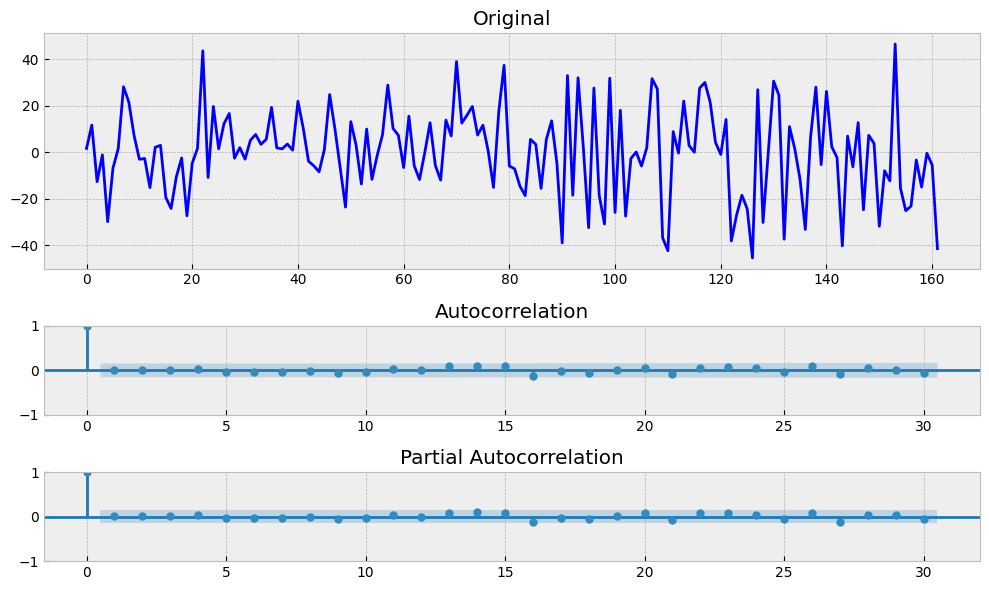

In [8]:
tsplot(best_mdl.resid, lags=30)
test_stationarity(best_mdl.resid)

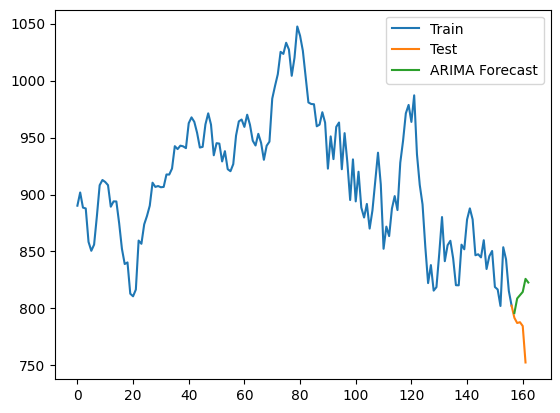

In [9]:
train_data = series[:-5]
test_data = series[-6:]
from sklearn.metrics import mean_absolute_error,  mean_squared_error

# построение модели ARIMA
model =  ARIMA(train_data, order=best_order, trend='c').fit(method='innovations_mle')

# оценка качества модели
predictions = model.forecast(len(test_data))


# визуализация прогноза и реальных значений
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions, label='ARIMA Forecast')
plt.legend()
plt.show()

In [46]:
predictions

157    795.966434
158    808.757726
159    811.631891
160    814.521573
161    825.976468
162    822.758968
Name: predicted_mean, dtype: float64

In [10]:
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

print(mae)
print(rmse)

31.000032224490667
37.12976768316848


*попробуeм спрогнозировать график классическими методами ML

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
X = np.array(series.index.tolist()[:-5]).reshape(-1, 1)
y = np.array(series[:-5].values).reshape(-1, 1)



# Dropping any rows with Nan values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X, y)

LinearRegression()

In [61]:
list_index = [157,158,159,160,161,162]
predict_linear = regr.predict(np.array(list_index).reshape(-1, 1))
predict_linear_df = pd.DataFrame(index = list_index, data=  predict_linear)
predict_linear_df

,0
157,887.224277
158,886.916753
159,886.609228
160,886.301703
161,885.994179
162,885.686654


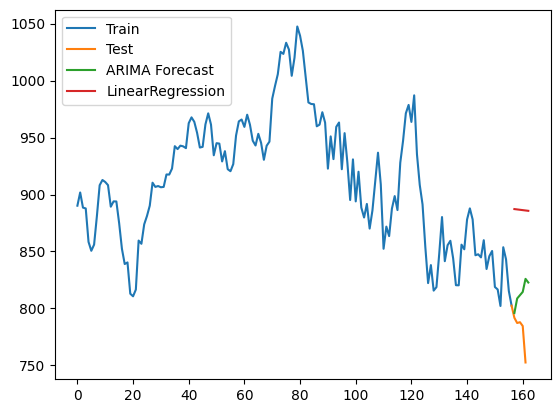

In [62]:
train_data = series[:-5]
test_data = series[-6:]
from sklearn.metrics import mean_absolute_error,  mean_squared_error

# построение модели ARIMA
model =  ARIMA(train_data, order=best_order, trend='c').fit(method='innovations_mle')

# оценка качества модели
predictions = model.forecast(len(test_data))


# визуализация прогноза и реальных значений
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions, label='ARIMA Forecast')
plt.plot(predict_linear_df, label='LinearRegression')

plt.legend()
plt.show()

In [63]:
mae = mean_absolute_error(test_data, predict_linear_df)
rmse = np.sqrt(mean_squared_error(test_data, predict_linear_df))

print(mae)
print(rmse)

102.03879897750124
103.11956422231141


Вывод: предсказывать временной ряд линейной регрессией очень плохая идея. мы просто находим среднее предыдущих данных.